In [16]:
!wget https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/tripadvisor_reviews.tsv
# Se lee con el comando dataset =pd.read_csv("tripadvisor_reviews.tsv", sep="\t")
# Recordar descargar los modelos de spacy y nltk necesarios para la resolución del ejercicio


--2021-04-18 10:49:31--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/tripadvisor_reviews.tsv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/tripadvisor_reviews.tsv [following]
--2021-04-18 10:49:31--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/tripadvisor_reviews.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14925041 (14M) [text/plain]
Saving to: ‘tripadvisor_reviews.tsv.1’

tripadvisor_reviews 100%[===================>]  14.23M  44.1MB/s    in 0.3s    

2021-04-18 10:49:31 (44.1 MB/s) - ‘tripa

# Ejercicio 1 (35%)

El objetivo de este ejercicio es comprobar los conocimientos adquiridos por el alumno en temas relacionados a las posibilidades de visualización de datos textuales y el proceso de preparación de los textos.

Para ello, teniendo en cuenta el conjunto de datos textuales del corpus, se solicita lo siguiente:

- **Apartado 1**: Información básica sobre el dataset: Número de documentos, número de documentos duplicados, número de elementos en cada clase. (10%)

- **Apartado 2**: Diseñar funciones para la limpieza de los textos:
    - Quitar palabras vacías. (10%)
    - Quitar símbolos de puntuación. (10%)
    - Lematización con Spacy. (10%)
    - Tokenización con NLTK. (10%)

- **Apartado 3**: Calcular y representar gráficamente en forma de distribución, como se vió en clase, las longitudes en caracteres y en tokens (despues del proceso de limpieza) de los documentos del corpus. (25%)

- **Apartado 4**: Cálcular y representar gráficamente en forma de histograma los 10 tokens más utilizados en cada una de las clases del corpus despues del proceso de limpieza (25%)


> Nota: Como se dijo en clase, para la obtención de la máxima calificación en los ejercicios es necesario que el código esté apropiadamente comentado indicando el proceso llevado a cabo por el alumno. Además, en el caso de las visualizaciones, deben incorporar **todos** los elementos necesarios para su correcta comprensión (leyenda, rotación de etiquetas si es necesario, etc). 

In [17]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import sys  
!{sys.executable} -m pip install contractions #Librería de python que entiende las contracciones como don't 

!pip install -U spacy
!python -m spacy download en_core_web_sm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string 
import re 
import contractions 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from tqdm.autonotebook import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.5)
2021-04-18 10:50:06.317220: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Una vez instalados y cargados, leemos el dataset:

In [18]:
dataset =pd.read_csv("tripadvisor_reviews.tsv", sep="\t")
dataset

,Review,positive
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",1
20487,great location price view hotel great quick pl...,1
20488,"ok just looks nice modern outside, desk staff ...",0
20489,hotel theft ruined vacation hotel opened sept ...,0


Como vemos, el dataset recoge reviews tanto positivas (1) como negativas (0) de hoteles en tripadvisor.

----------------------------------------------------------------------------------------------------------------------------------

**Apartado 1:** Información básica sobre el corpus: Número de documentos,
número de documentos duplicados, número de elementos en cada clase.
(10%)


In [19]:
# Número de documentos
print("Tenemos un conjunto de {} documentos".format(len(dataset)))

Tenemos un conjunto de 20491 documentos


In [20]:
# Número de documentos duplicado
print("Existen {} reviews duplicadas".format(np.sum(dataset.duplicated(subset=["Review"]))))

Existen 0 reviews duplicadas


In [21]:
# Nulos
print("Hay {} valores vacíos en las reviews y {} valores vacíos en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],
                                                                                                        np.sum(dataset.isnull())[1]))

Hay 0 valores vacíos en las reviews y 0 valores vacíos en las etiquetas en los datos


In [22]:
# Número de elementos en cada clase
dataset["positive"].value_counts()

1    15093
0     5398
Name: positive, dtype: int64

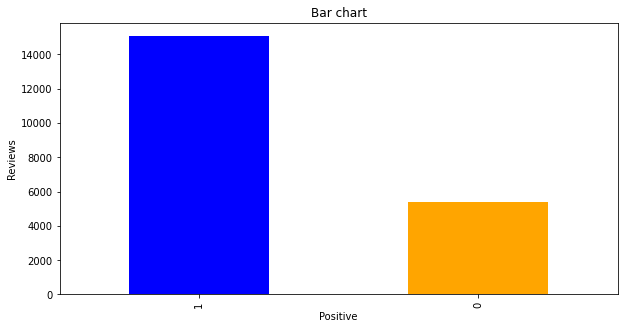

In [23]:
ax, fig = plt.subplots()
etiquetas = dataset.positive.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.ylabel('Reviews')
plt.xlabel('Positive')
plt.show()

Por tanto, estamos ante un dataset con 20491 reviews únicas de las cuáles 15093 son positivas y 5398 son negativas.

____________________________________________________________________________________________________________

**Apartado 2:** Diseñar funciones para la normalización de los textos:

o Quitar palabras vacías. (10%)

o Quitar símbolos de puntuación. (10%)

o Lematización con Spacy. (10%)

o Tokenización con NLTK. (10%)



Para ello, primero cargamos las funciones necesarias:

In [25]:
# Eliminar espacios
def eliminar_espacios(text): 
    return  " ".join(text.split()) 

# To lower
def texto_to_lower(text):
  return text.lower()

# Tokenizador utilizando nltk 
def tokenization(text):
  tokens = word_tokenize(text)
  return tokens

# Reemplazar contractions usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    expanded_words = []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = ' '.join(expanded_words) 
    return expanded_text

# Quitar stop words
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

# Eliminar signos de puntuación de una lista de tokens
# (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words

# Lematización con Spacy
import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)


In [26]:
# Quitar Espacios
dataset["normaliza"] = dataset["Review"].progress_apply(lambda x: eliminar_espacios(x))
# To Lower
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: texto_to_lower(x))
# Contraciones
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: replace_contraction(x))
# Tokenizar
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: tokenization(x))
# Quitar Stopwords
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_stopwords(x))
# Quitar puntuación
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: quitar_puntuacion(x))
# Lematización Spacy
dataset["normaliza"] = dataset["normaliza"].progress_apply(lambda x: lematizar(x))

dataset["normaliza"]

0        nice hotel expensive parking get good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    well keep secret 3rd time stay charm ca beat t...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff particu...
20489    hotel theft ruin vacation hotel open sept 17 2...
20490    people talk ca believe excellent rating hotel ...
Name: normaliza, Length: 20491, dtype: object

--------------------------------------------------------------------------------------------------------------------

**Apartado 3:** Calcular y representar gráficamente en forma de distribución,
como se vio en clase, las longitudes en caracteres y en tokens (después del
proceso de normalización) de los documentos del corpus. (25%)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


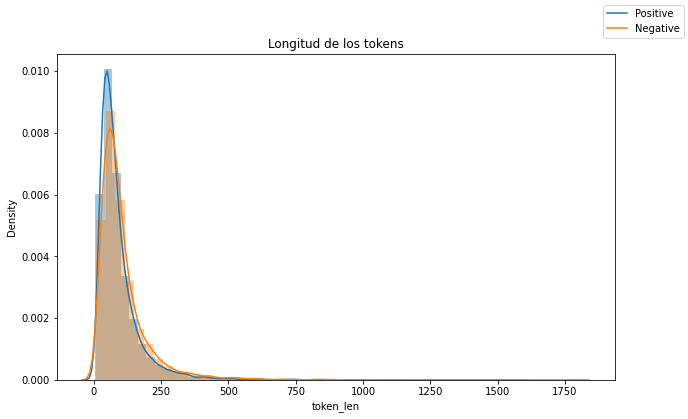

In [27]:
# Longitud en tokens de los textos
dataset["token_len"] = dataset["normaliza"].apply(lambda x: len(x.split()))


fig = plt.figure(figsize=(10,6))
plt1 = sns.distplot(dataset[dataset["positive"]==1]["token_len"], hist=True, label="Positive")
plt2 = sns.distplot(dataset[dataset["positive"]==0]["token_len"], hist=True, label="Negative")
fig.legend(labels=['Positive','Negative'])
plt.title("Longitud de los tokens")
plt.show()


La longitud de los tokens en textos vemos que no varía en función del tipo de reseña (positivo o negtivo). A pesar de ello, si nos fijamos minuciosamente, vemos que las reseñas negativas pueden ser ligeramente mas largas en número de tokens. 

Como vemos, en el siguiente gráfico ocurre lo mismo, no hay practicamente diferencias pero a la hora de elegir uno, serían las reseñas negativas aquellas con una mayor longitud en términos de caracteres.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


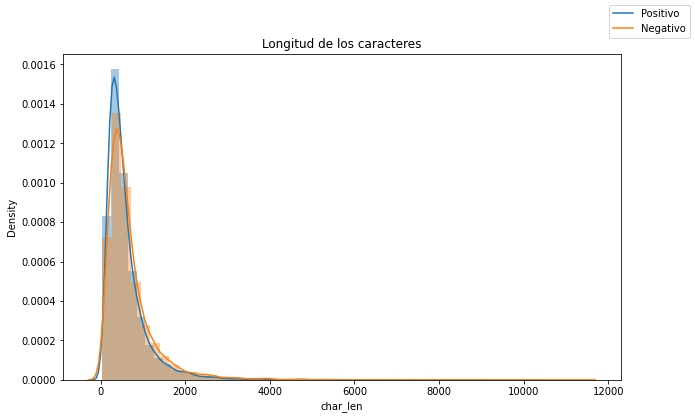

In [28]:
# Longitud en caracteres
    # Longitud de cada uno de los textos de los documentos
dataset["char_len"] = dataset["normaliza"].apply(lambda x: len(x))

fig = plt.figure(figsize=(10,6))
plt1 = sns.distplot(dataset[dataset["positive"]==1]["char_len"], hist=True, label="Positivo") 
plt2 = sns.distplot(dataset[dataset["positive"]==0]["char_len"], hist=True, label="Negativo") 
fig.legend(labels=['Positivo','Negativo'])
plt.title("Longitud de los caracteres")
plt.show()


------------------------------------------------------------------------------------------------------------------------

**Apartado 4:** Cálcular y representar gráficamente en forma de histograma los 10 tokens más utilizados en cada una de las clases del corpus despues del proceso de limpieza. (25%)

En primer lugar generamos una función que calcule la frecuencia de aparición de los tokens.

In [29]:
def frecuencia_tokens(lista): 
    # Creamos diccionario vacío 
    frecuencia = {} 
    for item in lista: 
        if (item in frecuencia): 
            frecuencia[item] += 1
        else: 
            frecuencia[item] = 1
    return frecuencia

Extraemos los tokens y los introducimos en una lista para posteriormente calcular la frecuencia de aparición de cada uno de ellos con la función definida en el paso previo.

In [30]:
# Creamos la lista de tokens normalizados
lista_tokens=list()
for i in dataset["normaliza"]:
  tokens_document = word_tokenize(i)
  lista_tokens.extend(tokens_document)

# Calculamos la frecuencia
dict_freq= frecuencia_tokens(lista_tokens)

Ordenamos los tokens para obtener los 10 tokens más usados:

In [31]:
dict_freq_order = sorted(dict_freq.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs= list()

for i in dict_freq_order[0:10]:
  token_names.append(i[0])
  token_freqs.append(i[1])

Representamos los tokens en un gráfico:

Text(0.5, 0, 'Tokens')

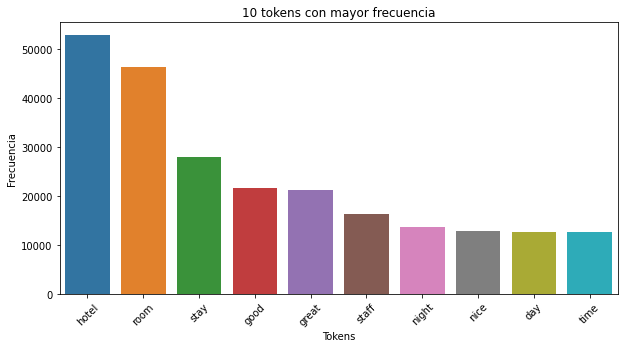

In [32]:
plt.rcParams['figure.figsize'] = [10,5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.xticks(rotation=45)
plt.title("10 tokens con mayor frecuencia")
plt.ylabel("Frecuencia")
plt.xlabel("Tokens")
